[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-3065936787.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()



FINANZIELLE KENNZAHLEN

Annualisierte Renditen:
 Ticker
EUNL.DE    0.154743
EXS1.DE    0.116374
SPY        0.173858
dtype: float64

Volatilität:
 Ticker
EUNL.DE    0.161299
EXS1.DE    0.196136
SPY        0.195845
dtype: float64

Sharpe Ratios:
 Ticker
EUNL.DE    0.835364
EXS1.DE    0.491362
SPY        0.785608
dtype: float64


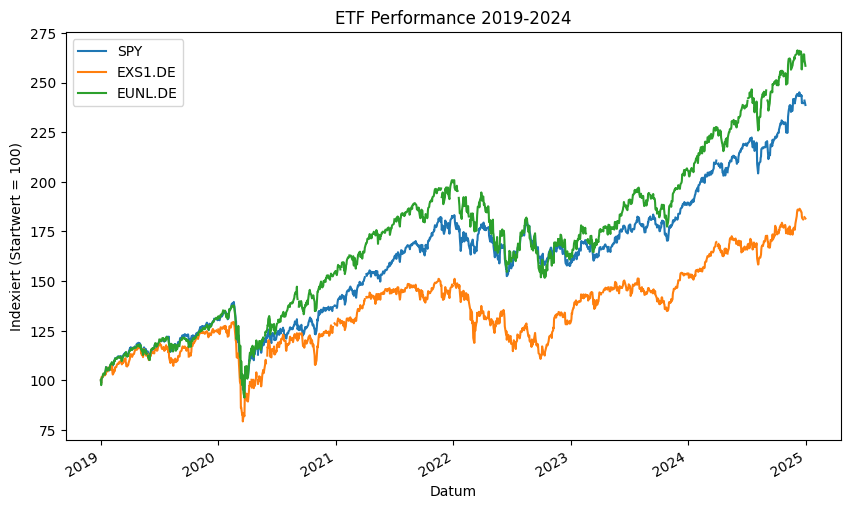

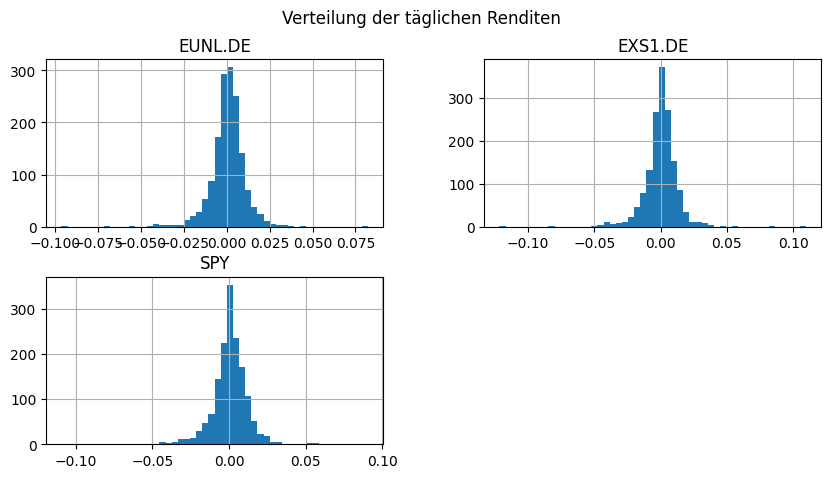

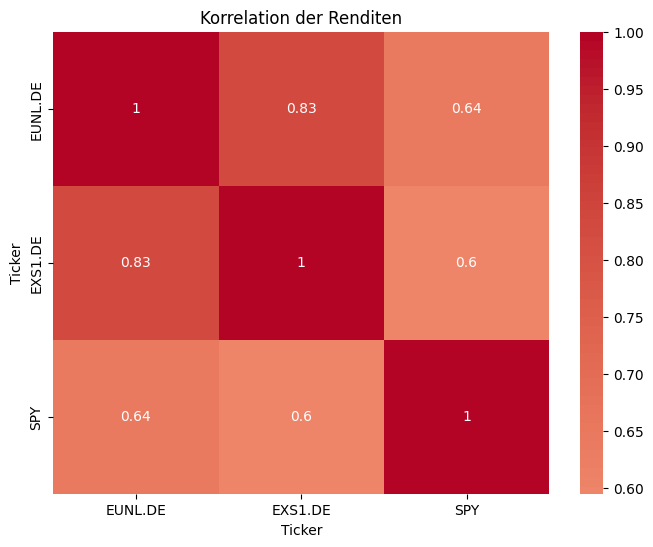




PORTFOLIO SIMULATION:

Portfolio Rendite: 0.147
Portfolio Volatilität: 0.162
Sharpe Ratio: 0.785


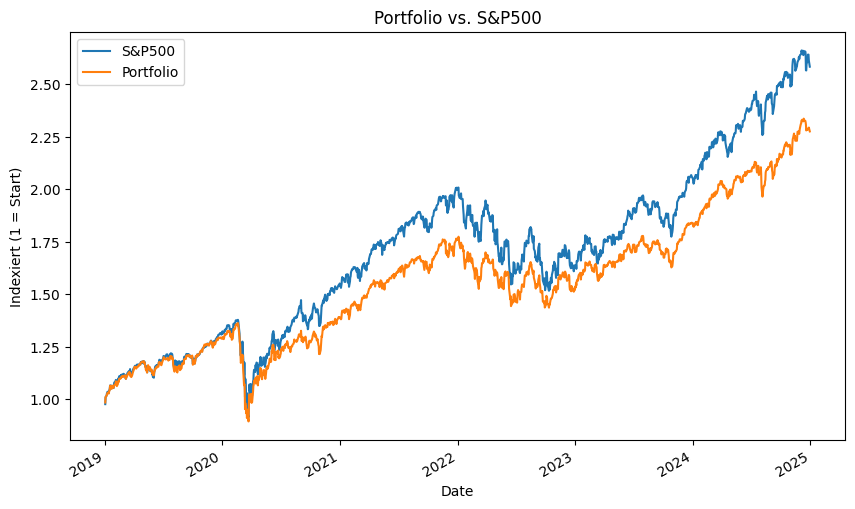

In [14]:
!pip install yfinance pandas numpy matplotlib seaborn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Beispieldaten S&P500 ETF, iShares DAX ETF, iShares Core MSCI World ETF
tickers = ["SPY", "EXS1.DE", "EUNL.DE"]
data = yf.download(tickers, start="2019-01-01", end="2024-12-31", auto_adjust=False)["Adj Close"]

#Rendite
returns = data.pct_change().dropna()

mean_returns = returns.mean() * 252   #annualisierte Rendite
volatility = returns.std() * np.sqrt(252)   #annualisierte Volatilität
risk_free_rate = 0.02
sharpe_ratio = (mean_returns - risk_free_rate) / volatility
cum_returns = (1 + returns).cumprod()

#Ausgabe
print("\nFINANZIELLE KENNZAHLEN\n")
print("Annualisierte Renditen:\n", mean_returns)
print("\nVolatilität:\n", volatility)
print("\nSharpe Ratios:\n", sharpe_ratio)

#Plotting
plt.figure(figsize=(10,6))
(data / data.iloc[0] * 100).plot(ax=plt.gca())    #normiert 100
plt.title("ETF Performance 2019-2024")
plt.ylabel("Indexiert (Startwert = 100)")
plt.xlabel("Datum")
plt.legend(tickers)
plt.show()

print("\n\n\n")

#Histogramm Renditen
returns.hist(bins=50,figsize=(10,5))
plt.suptitle("Verteilung der täglichen Renditen")
plt.show()

print("\n\n\n")

#Korrelation
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Korrelation der Renditen")
plt.show()



#Portfolio Simulation

# Beispiel-Portfolio: 50% S&P500, 30% DAX, 20% MSCI World
weights = np.array([0.5, 0.3, 0.2])
portfolio_returns = (returns * weights).sum(axis=1)

# Annualisierte Kennzahlen für Portfolio
p_return = portfolio_returns.mean() * 252
p_vol = portfolio_returns.std() * np.sqrt(252)
p_sharpe = (p_return - risk_free_rate) / p_vol
p_max_dd = ((1 + portfolio_returns).cumprod() / (1 + portfolio_returns).cumprod().cummax() - 1).min()

print("\n\n\nPORTFOLIO SIMULATION:\n")
print("Portfolio Rendite:", round(p_return, 3))
print("Portfolio Volatilität:", round(p_vol, 3))
print("Sharpe Ratio:", round(p_sharpe, 3))

# Vergleich Portfolio vs. ETFs
cum_portfolio = (1 + portfolio_returns).cumprod()
cum_compare = pd.concat([cum_returns["SPY"], cum_portfolio], axis=1)
cum_compare.columns = ["S&P500", "Portfolio"]

cum_compare.plot(figsize=(10,6))
plt.title("Portfolio vs. S&P500")
plt.ylabel("Indexiert (1 = Start)")
plt.show()

